In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
returns = pd.read_pickle('Data/returns.pkl')
returns.head()

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-04 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-05 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   
1990-01-08  2.017423 -0.873016  0.000000  2.534319  0.000000  0.000000   

              936365    902355    912215    929813  ...  9660J1  69568X  \
date                                                ...                   
1990-01-02       NaN       NaN       NaN       NaN  ...     NaN     NaN   
1990-01-03 -3.030303  0.000000 -0.431034 -1.315789  ...     NaN     NaN   
1990-01-04 -1.562500  0.530612  0.225108  0.000000  ...     NaN     NaN   
1990-01-05 -3.174603  0.487211 -0.656531 -1.333333  ...     NaN     NaN   
1990-01-08  0.000000  1.010101  0.434783  3.405405  ...     NaN     NaN   

            543755  77463M  29235J  131745  69487D  68157P  9110RA  292703  
date                                                                        
1990-01-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1236 columns]

In [42]:
returns.iloc[[0]].isna().sum().sum()

1236

### Insert Model Here

In [16]:
daysToShift = 1

def modelShiftDays(days):
    new_df = returns.shift(days, axis=0)
    return new_df

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

df_pred.head()

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-04 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-05 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-08 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   

              936365    902355    912215    929813  ...  9660J1  69568X  \
date                                                ...                   
1990-01-02       NaN       NaN       NaN       NaN  ...     NaN     NaN   
1990-01-03       NaN       NaN       NaN       NaN  ...     NaN     NaN   
1990-01-04 -3.030303  0.000000 -0.431034 -1.315789  ...     NaN     NaN   
1990-01-05 -1.562500  0.530612  0.225108  0.000000  ...     NaN     NaN   
1990-01-08 -3.174603  0.487211 -0.656531 -1.333333  ...     NaN     NaN   

            543755  77463M  29235J  131745  69487D  68157P  9110RA  292703  
date                                                                        
1990-01-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1236 columns]

### Plotting Data

In [5]:
# For the first listed stock:

# create dataframe for all given days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]]
df['predicted'] = df_pred[returns.columns[0]]
df['date'] = returns.index
df.reset_index(drop=True, inplace = True)
df.head()

actual  predicted       date
0       NaN        NaN 1990-01-02
1 -0.835165        NaN 1990-01-03
2 -0.797872  -0.835165 1990-01-04
3 -2.546917  -0.797872 1990-01-05
4  2.017423  -2.546917 1990-01-08

<AxesSubplot:xlabel='date', ylabel='actual'>

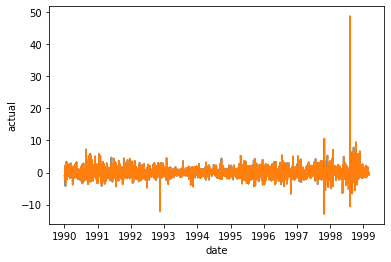

In [6]:
sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

Text(0.5, 1.0, 'Predicted vs Actual')

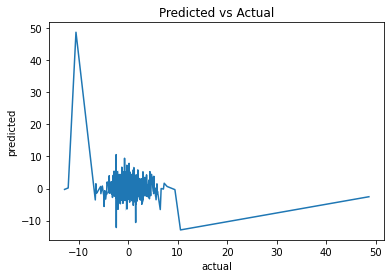

In [7]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

In [8]:
# For the first listed stock:

# create dataframe with all relevant data for first 30 days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]].iloc[:30]
df['predicted'] = df_pred[returns.columns[0]].iloc[:30]
df['date'] = returns.index[:30]
df.reset_index(drop=True, inplace = True)
df.head()

actual  predicted       date
0       NaN        NaN 1990-01-02
1 -0.835165        NaN 1990-01-03
2 -0.797872  -0.835165 1990-01-04
3 -2.546917  -0.797872 1990-01-05
4  2.017423  -2.546917 1990-01-08

<AxesSubplot:xlabel='date', ylabel='actual'>

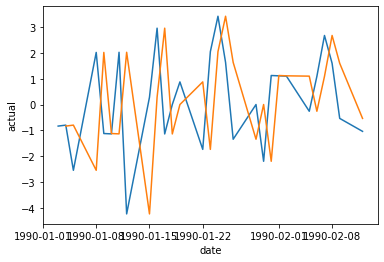

In [9]:
sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

Text(0.5, 1.0, 'Predicted vs Actual')

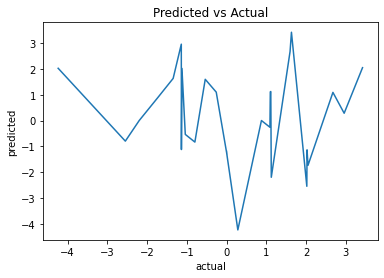

In [10]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

### Testing for Multiple Stocks

In [11]:
stock = df_pred.iloc[:30, 4]
stock.head()

date
1990-01-02         NaN
1990-01-03         NaN
1990-01-04    0.361421
1990-01-05   -0.180060
1990-01-08   -1.079730
Name: 916328, dtype: float64

In [12]:
daysToShift = 1

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

df_pred.head()

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-04 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-05 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-08 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   

              936365    902355    912215    929813  ...  9660J1  69568X  \
date                                                ...                   
1990-01-02       NaN       NaN       NaN       NaN  ...     NaN     NaN   
1990-01-03       NaN       NaN       NaN       NaN  ...     NaN     NaN   
1990-01-04 -3.030303  0.000000 -0.431034 -1.315789  ...     NaN     NaN   
1990-01-05 -1.562500  0.530612  0.225108  0.000000  ...     NaN     NaN   
1990-01-08 -3.174603  0.487211 -0.656531 -1.333333  ...     NaN     NaN   

            543755  77463M  29235J  131745  69487D  68157P  9110RA  292703  
date                                                                        
1990-01-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1236 columns]

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-04 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-05 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   
1990-01-08  2.017423 -0.873016  0.000000  2.534319  0.000000  0.000000   

              936365    902355    912215    929813  
date                                                
1990-01-02       NaN       NaN       NaN       NaN  
1990-01-03 -3.030303  0.000000 -0.431034 -1.315789  
1990-01-04 -1.562500  0.530612  0.225108  0.000000  
1990-01-05 -3.174603  0.487211 -0.656531 -1.333333  
1990-01-08  0.000000  1.010101  0.434783  3.405405

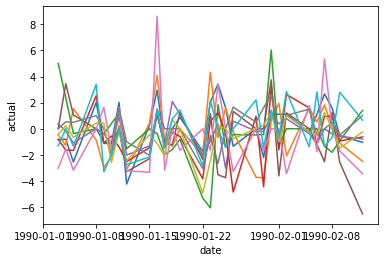

In [13]:
numStocks = 10
for i in range(numStocks):
    #stock = df_pred.iloc[:30, i]
    #pred_list[name] = stock
    
    # create dataframe with all relevant data for first 30 days
    df_actual = pd.DataFrame()
    df_actual['actual'] = returns[returns.columns[i]].iloc[:30]
    df_actual['date'] = returns.index[:30]
    df.reset_index(drop=True, inplace = True)
    sns.lineplot(data=df_actual, x='date', y='actual')
    
df_actualreturn = pd.DataFrame()
df_actualreturn = returns[returns.columns[0:numStocks]].iloc[:30]
df_actualreturn.head()

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-04 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-05 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-08 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   

              936365    902355    912215    929813  
date                                                
1990-01-02       NaN       NaN       NaN       NaN  
1990-01-03       NaN       NaN       NaN       NaN  
1990-01-04 -3.030303  0.000000 -0.431034 -1.315789  
1990-01-05 -1.562500  0.530612  0.225108  0.000000  
1990-01-08 -3.174603  0.487211 -0.656531 -1.333333

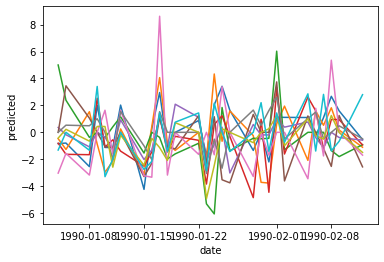

In [14]:
for i in range(numStocks):
    
    # create dataframe with all relevant data for first 30 days
    df_p= pd.DataFrame()
    df_p['predicted'] = df_pred[returns.columns[i]].iloc[:30]
    df_p['date'] = returns.index[:30]
    df.reset_index(drop=True, inplace = True)
    sns.lineplot(data=df_p, x='date', y='predicted')
    
df_predreturn = pd.DataFrame()
df_predreturn = df_pred[returns.columns[0:numStocks]].iloc[:30]
df_predreturn.head()

### Getting Top Returns

In [43]:
df_predreturn.head()

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-04 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-05 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-08 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   

              936365    902355    912215    929813  
date                                                
1990-01-02       NaN       NaN       NaN       NaN  
1990-01-03       NaN       NaN       NaN       NaN  
1990-01-04 -3.030303  0.000000 -0.431034 -1.315789  
1990-01-05 -1.562500  0.530612  0.225108  0.000000  
1990-01-08 -3.174603  0.487211 -0.656531 -1.333333

In [25]:
maxValuesObj = df_predreturn.max(axis=1)
Stock = df_predreturn.idxmax(axis=1)

topReturns = pd.DataFrame()
topReturns['Stock'] = Stock
topReturns['Return'] = maxValuesObj

print('Top Returns Per Day')
topReturns

Top Returns Per Day


Stock    Return
date                        
1990-01-02     NaN       NaN
1990-01-03     NaN       NaN
1990-01-04  904261  5.000000
1990-01-05  923024  3.454545
1990-01-08  921795  1.531023
1990-01-09  929813  3.405405
1990-01-10  936365  1.639344
1990-01-11  904261  0.406250
1990-01-12  905270  2.022989
1990-01-15  902355 -1.004823
1990-01-16  921795  0.434028
1990-01-17  936365  8.620690
1990-01-18  902355  0.000000
1990-01-19  916328  2.086895
1990-01-22  929813  1.438435
1990-01-23  936365  0.000000
1990-01-24  921795  4.332756
1990-01-25  905270  3.418414
1990-01-26  905270  1.630674
1990-01-29  902355  1.652174
1990-01-30  929813  2.202899
1990-01-31  902355  1.617021
1990-02-01  904261  6.026786
1990-02-02  921795  1.946903
1990-02-05  929813  2.857143
1990-02-06  936365  1.785714
1990-02-07  929813  2.816901
1990-02-08  936365  5.357143
1990-02-09  905270  1.595968
1990-02-12  929813  2.796421

In [27]:
# save as csv file
topReturns.to_csv('Data/topReturns.csv')

In [54]:
df_predreturn = df_predreturn.transpose()
df_predreturn.head()

date    1990-01-02  1990-01-03  1990-01-04  1990-01-05  1990-01-08  \
905270         NaN         NaN   -0.835165   -0.797872   -2.546917   
921795         NaN         NaN   -0.475059   -1.272872    1.531023   
904261         NaN         NaN    5.000000    2.380952   -0.372093   
905261         NaN         NaN   -0.810537   -1.634321   -1.661475   
916328         NaN         NaN    0.361421   -0.180060   -1.079730   

date    1990-01-09  1990-01-10  1990-01-11  1990-01-12  1990-01-15  ...  \
905270    2.017423   -1.123596   -1.136364    2.022989   -4.236142  ...   
921795   -0.873016   -2.962370   -2.145215    0.252951   -3.111859  ...   
904261    0.000000   -0.404606    0.406250    1.151572   -1.538462  ...   
905261    2.534319   -1.098524   -0.555363   -1.396161   -2.513274  ...   
916328    0.000000   -0.364707   -1.281146    0.926980   -2.018002  ...   

date    1990-01-30  1990-01-31  1990-02-01  1990-02-02  1990-02-05  \
905270    0.000000   -2.197802    1.123596    1.111111    1.098901   
921795   -3.712871   -3.770351    0.623330    1.946903   -2.083333   
904261   -0.479174   -0.444444    6.026786   -1.298246    0.000000   
905261    0.963468   -4.453280    3.329172   -1.610954    2.619730   
916328   -0.193643   -0.194019    0.971979    0.385049    0.767144   

date    1990-02-06  1990-02-07  1990-02-08  1990-02-09  1990-02-12  
905270   -0.260870    1.089799    2.673566    1.595968   -0.537412  
921795    1.595745    0.523560    1.822917    0.170503   -1.106383  
904261    0.000000    0.000000   -1.350871   -1.801802   -0.917431  
905261    1.595533   -1.256380    0.954274    0.945254   -0.936403  
916328   -0.380652   -1.146319    0.000000   -0.386537   -0.579284  

[5 rows x 30 columns]

In [68]:
#get top three stocks with highest returns per day
topN_returns = pd.DataFrame()
for i in range(df_predreturn.shape[1]):
    colName = df_predreturn.columns[i]
    top = df_predreturn.nlargest(3, colName)
    topN_returns[colName] = top

topN_returns.head()    

ValueError: Wrong number of items passed 30, placement implies 1